In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [103]:
train_data = pd.read_csv("flight_dataset.csv")

In [104]:
pd.set_option("display.max_columns", None)

In [105]:
train_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [107]:
df = pd.read_csv("flight_dataset.csv", index_col=0)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [109]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [110]:
df.shape

(300153, 11)

In [111]:
df = df.rename(columns={'class': 'flight_class'})

In [112]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [113]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [114]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

Preprocessing

In [115]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'flight_class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [116]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [117]:
df = df.drop("flight", axis=1)

# df['flight_class'] = df['flight_class'].apply(lambda x: 1 if x == "Business" else 0)

In [118]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [119]:
df.flight_class.unique()

array(['Economy', 'Business'], dtype=object)

In [120]:
df.stops = pd.factorize(df.stops)[0]

In [121]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


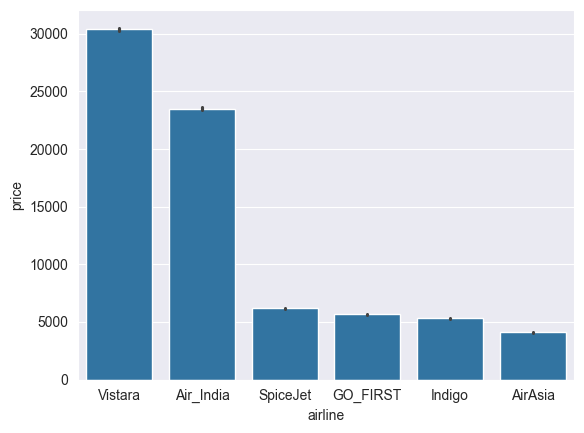

In [122]:
# from the graph we can see that AirAsia Airways have the highest Price

sns.barplot(y="price", x="airline", data=df.sort_values("price", ascending=False));

In [123]:
df.describe()

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,12.221021,26.004751,20889.660523
std,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.830000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


In [124]:
def one_hot_encode_column(data_frame, column_name, ):
    """
    This function takes a DataFrame and a column name, performs one-hot encoding
    on the specified column, and returns the DataFrame with the new encoded columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to be modified.
    column_name (str): The column name to be one-hot encoded.

    Returns:
    pd.DataFrame: The DataFrame with the specified column one-hot encoded and the original column dropped.
    """
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)

    # Select the column for encoding
    column_df = df[[column_name]]

    # Perform one-hot encoding
    encoded = encoder.fit_transform(column_df)

    # Convert the encoded data into a DataFrame with appropriate column names
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column_name]))

    # Concatenate the original DataFrame with the new encoded columns
    df_encoded = pd.concat([df, encoded_df], axis=1)

    # Drop the original column that was encoded
    df_encoded.drop(column_name, axis=1, inplace=True)

    return df_encoded


In [125]:
df = one_hot_encode_column(df, "airline")
df.head()

,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0
1,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0
3,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0
4,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='source_city', ylabel='price'>

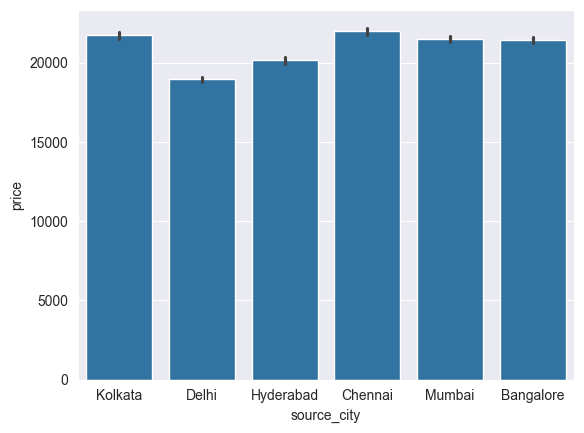

In [126]:
df['source_city'].value_counts()

# source_city vs price
sns.barplot(y="price", x="source_city", data=df.sort_values("price", ascending=False))


In [127]:
source_city = df[["source_city"]]

df = one_hot_encode_column(df, 'source_city')
df.columns


Index(['departure_time', 'stops', 'arrival_time', 'destination_city',
       'flight_class', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai'],
      dtype='object')

In [128]:
destination = df[["destination_city"]]

df = one_hot_encode_column(df, 'destination_city')

print(df[['departure_time']])
df = one_hot_encode_column(df, 'departure_time')
print(df.head())

       departure_time
0             Evening
1       Early_Morning
2       Early_Morning
3             Morning
4             Morning
...               ...
300148        Morning
300149      Afternoon
300150  Early_Morning
300151  Early_Morning
300152        Morning

[300153 rows x 1 columns]
   stops   arrival_time flight_class  duration  days_left  price  \
0      0          Night      Economy      2.17          1   5953   
1      0        Morning      Economy      2.33          1   5953   
2      0  Early_Morning      Economy      2.17          1   5956   
3      0      Afternoon      Economy      2.25          1   5955   
4      0        Morning      Economy      2.33          1   5955   

   airline_AirAsia  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0              0.0                0.0               0.0             0.0   
1              0.0                0.0               0.0             0.0   
2              1.0                0.0               0.0             0.0   


In [129]:
print(df.arrival_time)
df = one_hot_encode_column(df, 'arrival_time')
print(df.head())

0                 Night
1               Morning
2         Early_Morning
3             Afternoon
4               Morning
              ...      
300148          Evening
300149            Night
300150            Night
300151          Evening
300152          Evening
Name: arrival_time, Length: 300153, dtype: object
   stops flight_class  duration  days_left  price  airline_AirAsia  \
0      0      Economy      2.17          1   5953              0.0   
1      0      Economy      2.33          1   5953              0.0   
2      0      Economy      2.17          1   5956              1.0   
3      0      Economy      2.25          1   5955              0.0   
4      0      Economy      2.33          1   5955              0.0   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                0.0               0.0             0.0               1.0   
1                0.0               0.0             0.0               1.0   
2                0.0               0.

In [130]:
destination = df[["flight_class"]]

df = one_hot_encode_column(df, 'flight_class')

print(df.head())


   stops  duration  days_left  price  airline_AirAsia  airline_Air_India  \
0      0      2.17          1   5953              0.0                0.0   
1      0      2.33          1   5953              0.0                0.0   
2      0      2.17          1   5956              1.0                0.0   
3      0      2.25          1   5955              0.0                0.0   
4      0      2.33          1   5955              0.0                0.0   

   airline_GO_FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
0               0.0             0.0               1.0              0.0   
1               0.0             0.0               1.0              0.0   
2               0.0             0.0               0.0              0.0   
3               0.0             0.0               0.0              1.0   
4               0.0             0.0               0.0              1.0   

   source_city_Bangalore  source_city_Chennai  source_city_Delhi  \
0                    0.0      

In [131]:
X, y = df.drop('price', axis=1), df.price


In [132]:
print("x data",X)
print("y data", y)

x data         stops  duration  days_left  airline_AirAsia  airline_Air_India  \
0           0      2.17          1              0.0                0.0   
1           0      2.33          1              0.0                0.0   
2           0      2.17          1              1.0                0.0   
3           0      2.25          1              0.0                0.0   
4           0      2.33          1              0.0                0.0   
...       ...       ...        ...              ...                ...   
300148      1     10.08         49              0.0                0.0   
300149      1     10.42         49              0.0                0.0   
300150      1     13.83         49              0.0                0.0   
300151      1     10.00         49              0.0                0.0   
300152      1     10.08         49              0.0                0.0   

        airline_GO_FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
0                    0.0 

In [133]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(X_train, y_train)
#
# model.score(X_test, y_test)
# print(model.score(X_test, y_test))
#
# # Hyperparameter tuning
#
# y_pred = model.predict(X_test)

In [134]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [136]:
y_predict = dt_regressor.predict(X_test)

Root Squared:  0.9759438536817697
Mean Absolute Error:  1162.9899190973554
Mean Squared Error:  12400516.997426793
Root Mean Squares Error:  3521.43678026836


Text(0, 0.5, 'Predicted VS Actual Price')

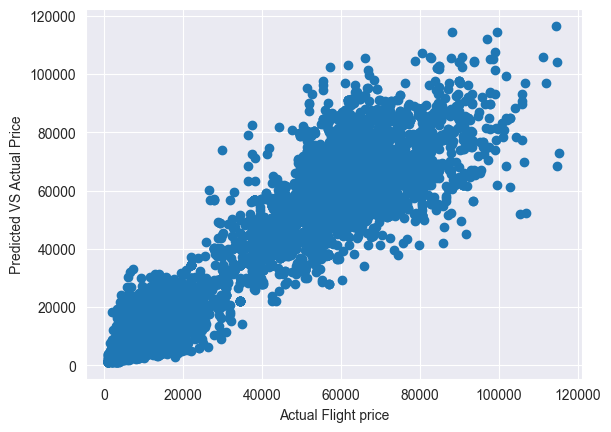

In [137]:
import math


print("Root Squared: ", r2_score(y_test, y_predict))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", mean_squared_error(y_test, y_predict))
print("Root Mean Squares Error: ", math.sqrt(mean_squared_error(y_test, y_predict)))

plt.scatter(y_test, y_predict)
plt.xlabel("Actual Flight price")
plt.ylabel("Predicted Flight Price")
plt.ylabel("Predicted VS Actual Price")


In [138]:
df["price"].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [139]:
# importance = dict(zip(model.feature_names_in_, model.feature_importances_))
# sorted_importances = sorted(importance.items(), key=lambda x: x[1], reverse=True)
#
# print(sorted_importances)

In [140]:
# Sample a smaller portion of the data
X_train_sample = X_train.sample(frac=0.1, random_state=42)  # 10% of the data
y_train_sample = y_train.sample(frac=0.1, random_state=42)


In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.tree import DecisionTreeRegressor

# Define the parameter distribution (n_estimators removed for DecisionTree)
param_dist = {
    'max_depth': randint(10,50),       # Try different depths
    'min_samples_split': randint(2, 11),           # Random split values
    'min_samples_leaf': randint(1, 5),             # Random minimum leaf sizes
    'max_features': ['sqrt', 'log2']               # Correct features options
}

# Define the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,                                     # Increase iterations for better hyperparameter search
    cv=5,                                          # 5-fold cross-validation
    scoring='neg_mean_squared_error',              # For regression tasks
    verbose=2,
    random_state=10,
    n_jobs=-1                                      # Parallel execution for speed
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best estimator
best_regressor = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters:  {'max_depth': 39, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10}


In [142]:
# importance = dict(zip(model.feature_names_in_, model.feature_importances_))
# sorted_importances = sorted(importance.items(), key=lambda x: x[1], reverse=True)
#
# # Output top 10 most important features
# top_features = sorted_importances[:10]
# print("Top 10 important features:", top_features)


In [143]:
# Train on the full dataset with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=39, max_features='log2', min_samples_leaf=3,
                      min_samples_split=10, random_state=42)

In [144]:
# Predict on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 11270329.719111253


In [145]:
df.columns

Index(['stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai',
       'departure_time_Afternoon', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night', 'flight_class_Business',
       'flight_class_Economy'],
      dtype='object')

In [146]:
df.stops

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [147]:
df.days_left

0          1
1          1
2          1
3          1
4          1
          ..
300148    49
300149    49
300150    49
300151    49
300152    49
Name: days_left, Length: 300153, dtype: int64

In [148]:
df.duration

0          2.17
1          2.33
2          2.17
3          2.25
4          2.33
          ...  
300148    10.08
300149    10.42
300150    13.83
300151    10.00
300152    10.08
Name: duration, Length: 300153, dtype: float64

In [149]:
print(random_search.feature_names_in_)

['stops' 'duration' 'days_left' 'airline_AirAsia' 'airline_Air_India'
 'airline_GO_FIRST' 'airline_Indigo' 'airline_SpiceJet' 'airline_Vistara'
 'source_city_Bangalore' 'source_city_Chennai' 'source_city_Delhi'
 'source_city_Hyderabad' 'source_city_Kolkata' 'source_city_Mumbai'
 'destination_city_Bangalore' 'destination_city_Chennai'
 'destination_city_Delhi' 'destination_city_Hyderabad'
 'destination_city_Kolkata' 'destination_city_Mumbai'
 'departure_time_Afternoon' 'departure_time_Early_Morning'
 'departure_time_Evening' 'departure_time_Late_Night'
 'departure_time_Morning' 'departure_time_Night' 'arrival_time_Afternoon'
 'arrival_time_Early_Morning' 'arrival_time_Evening'
 'arrival_time_Late_Night' 'arrival_time_Morning' 'arrival_time_Night'
 'flight_class_Business' 'flight_class_Economy']


In [150]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

Cross-validated MSE: 54585730.60601429


In [153]:
import joblib
new_data = pd.DataFrame([{
    'stops': 0,
    'duration': 2.17,  # In minutes
    'days_left': 1,
    'airline_AirAsia': 0,
    'airline_Air_India': 0,
    'airline_GO_FIRST': 0,
    'airline_Indigo': 0,
    'airline_SpiceJet': 1,  # SpiceJet is the selected airline
    'airline_Vistara': 0,
    'source_city_Bangalore': 0,
    'source_city_Chennai': 0,
    'source_city_Delhi': 1,
    'source_city_Hyderabad': 0,
    'source_city_Kolkata': 0,  # Kolkata is the source city
    'source_city_Mumbai': 0,
    'destination_city_Bangalore': 0,
    'destination_city_Chennai': 0,  # Chennai is the destination city
    'destination_city_Delhi': 0,
    'destination_city_Hyderabad': 0,
    'destination_city_Kolkata': 0,
    'destination_city_Mumbai': 1,
    'departure_time_Afternoon': 0,
    'departure_time_Early_Morning': 0,
    'departure_time_Evening': 1,
    'departure_time_Late_Night': 0,
    'departure_time_Morning': 0,  # Morning is the departure time
    'departure_time_Night': 0,
    'arrival_time_Afternoon':0,
    'arrival_time_Early_Morning':0,
    'arrival_time_Evening':0,
    'arrival_time_Late_Night':0,
    'arrival_time_Morning':0,
    'arrival_time_Night':1,
    'flight_class_Business': 1,
    'flight_class_Economy': 0,
    # Late Night is the arrival time
}])

# Load the model
joblib.dump(best_model,"final_model.pkl")
loaded_model = joblib.load('final_model.pkl')

# Predict
predictions = loaded_model.predict(new_data)
print(f"Predicted Price: {predictions}")

Predicted Price: [35666.00858369]
